# Classification using DNN


## Problem
     Apply classification for data points where quality in (4,7) after PCA

## Approach

   Applied the following techniques from [TensorFlow](https://www.tensorflow.org) library <br>
   Techniques : [DNNClassifier](https://www.tensorflow.org/api_docs/python/tf/estimator/DNNClassifier), [LinearClassifier](https://www.tensorflow.org/api_docs/python/tf/estimator/LinearClassifier)

   Evaluated with the following metrics <br>
   Metrics    : Confusion Matrix, f1-score, precision, recall
    
## Data
[Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality) 

Description of data (based on physicochemical tests): 

| Input                | Description |
| :---                 | :---        |
| fixed acidity        | most acids involved with wine or fixed or nonvolatile (do not evaporate readily) |
| volatile acidity     | the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste |
| citric acid          | found in small quantities, citric acid can add 'freshness' and flavor to wines |
| residual sugar       | the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet  |
| chlorides            | the amount of salt in the wine|
| free sulfur dioxide  | the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine |
| total sulfur dioxide | amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine |
| density              | the density of water is close to that of water depending on the percent alcohol and sugar content |
| pH                   | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale |
| sulphates            | a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant |
| alcohol              | the percent alcohol content of the wine |
|                      |   |
|                      |
| <b>Output</b>               | <b>Description</b> |
| quality              | Output variable (based on sensory data), (score between 0 and 10) |


### References
   1. [DNNClassifier](https://www.tensorflow.org/api_docs/python/tf/estimator/DNNClassifier)
   1. [LinearClassifier](https://www.tensorflow.org/api_docs/python/tf/estimator/LinearClassifier)
   1. [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
   1. [f1-score, precision, recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [1]:
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scaler
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# Train-Test data split
from sklearn.model_selection import train_test_split

# TensorFlow for Classification
import tensorflow as tf

# Metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
data = pd.read_csv('./data/winequality-red.csv',sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There is no missing value in independent variables. All independent variables are numerical. 

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Data Analysis (EDA) (<i>very short</i>)

Statistical summary of each indendent variable and output('quality'). <br> 

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The min value of <b>quality</b> is 3 and max value of <b>quality</b> is 8. 

In [6]:
d = data['quality'].value_counts()
pd_d = pd.DataFrame(d.index,index=None,columns=['quality'])
pd_d['count'] = d.values
pd_d['percentage of observations'] = 100*d.values/(d.values.sum())
pd_d

,quality,count,percentage of observations
0,5,681,42.589118
1,6,638,39.899937
2,7,199,12.445278
3,4,53,3.314572
4,8,18,1.125704
5,3,10,0.625391


Majority of observations are in class 5 and 6. 

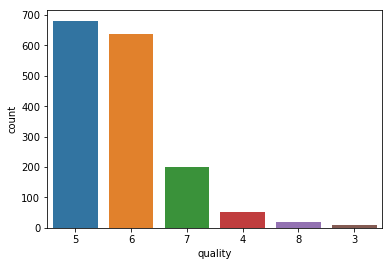

In [7]:
sns.countplot(data.quality,order=data['quality'].value_counts().index)

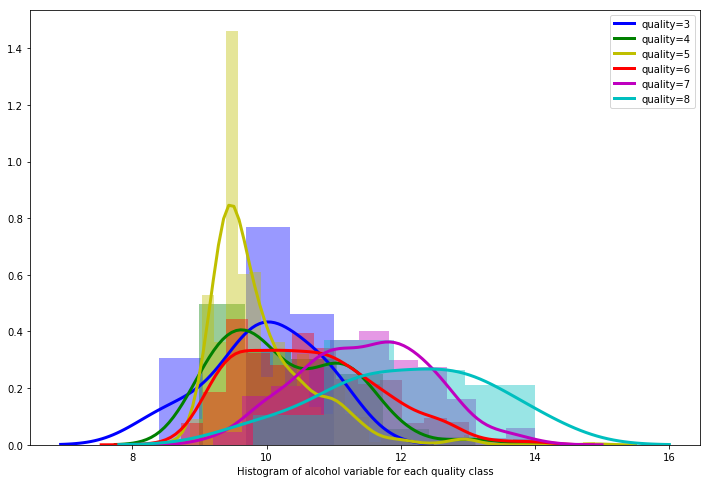

In [8]:
# Set a larger display area
plt.figure(figsize=(12,8))
sns.distplot(data[data['quality']==3].alcohol,color='b',kde_kws = {'linewidth': 3,"label":"quality=3"})
sns.distplot(data[data['quality']==4].alcohol,color='g',kde_kws = {'linewidth': 3,"label":"quality=4"})
sns.distplot(data[data['quality']==5].alcohol,color='y',kde_kws = {'linewidth': 3,"label":"quality=5"})
sns.distplot(data[data['quality']==6].alcohol,color='r',kde_kws = {'linewidth': 3,"label":"quality=6"})
sns.distplot(data[data['quality']==7].alcohol,color='m',kde_kws = {'linewidth': 3,"label":"quality=7"})
sns.distplot(data[data['quality']==8].alcohol,color='c',kde_kws = {'linewidth': 3,"label":"quality=8"},
             axlabel='Histogram of alcohol variable for each quality class')

In [9]:
data_47 = data[(data['quality']==4) | (data['quality']==7) ]

In [10]:
# PCA
X = data_47[data_47.columns[:11]]
y = data_47['quality']

In [11]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5
18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7


In [12]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_d47 = scaler.transform(X)

In [14]:
pca = PCA(n_components=10)
pca.fit(scaled_d47)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.components_

array([[ 0.47481504, -0.25687033,  0.46657262,  0.12392987,  0.21455365,
         0.00355208, -0.00984558,  0.37287981, -0.45259989,  0.26626302,
        -0.12080915],
       [-0.12095821, -0.35750397,  0.20581816,  0.15580864, -0.1405332 ,
         0.44157729,  0.49411057, -0.3165333 , -0.00146716,  0.2022892 ,
         0.43694489],
       [-0.02955318,  0.40468377, -0.13648022,  0.24172729,  0.16022305,
         0.47036328,  0.48721745,  0.30229781,  0.04636613, -0.08132657,
        -0.41696168],
       [-0.20276289,  0.02541081, -0.06823279, -0.47913644,  0.55899964,
         0.16950959, -0.08001092, -0.10150316,  0.12224745,  0.58736619,
        -0.07843363],
       [-0.19396224,  0.20535516,  0.03218823,  0.66238259,  0.47007445,
        -0.31415222, -0.05615676,  0.02632129,  0.12016816,  0.13069184,
         0.35410789],
       [-0.17476228, -0.0265893 ,  0.11344812, -0.08467969,  0.41841912,
        -0.10835244,  0.16964475, -0.48407022, -0.50320908, -0.46182521,
        -0.179

Display the amount and percentage of variance explained by each of the selected components

In [16]:
pca_exp_var = pd.DataFrame(pca.explained_variance_,columns=['amount of explained variance'])
pca_exp_var['percentage of explained variance'] = pca.explained_variance_ratio_
pca_exp_var

,amount of explained variance,percentage of explained variance
0,3.456326,0.312965
1,1.902141,0.172236
2,1.607089,0.145519
3,1.257365,0.113852
4,1.016207,0.092016
5,0.567301,0.051368
6,0.459599,0.041616
7,0.348088,0.031519
8,0.245696,0.022247
9,0.127632,0.011557


In [17]:
print(' Sum of pca.explained_variance_ratio_ is',pca.explained_variance_ratio_.sum())

 Sum of pca.explained_variance_ratio_ is 0.994894721041


In [18]:
d47_pca = pd.DataFrame(pca.components_,columns=X.columns)

Display the weights of each input variable (column) for each component (row) 

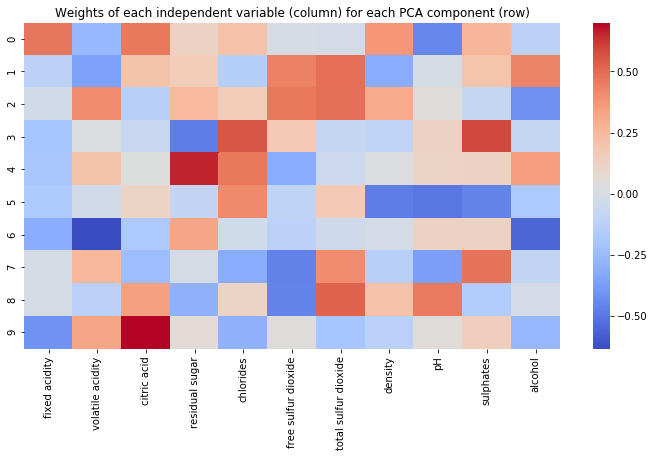

In [19]:
plt.figure(figsize=(12,6))
plt.title('Weights of each independent variable (column) for each PCA component (row)')
sns.heatmap(d47_pca,cmap='coolwarm',)

In [20]:
pca_X = pca.transform(scaler.transform(X))
#y = data_47['quality']

In [21]:
PCA_cnames = ['PCA0','PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9']
df_pca_X = pd.DataFrame(pca_X,index=X.index,columns=PCA_cnames)

In [22]:
df_pca_X['quality']=y
df_pca_X.head()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,quality
7,-2.238139,-1.379439,0.523956,0.046480,-1.133081,0.746279,0.116232,-0.163079,-0.366781,-0.177075,7
8,-1.185663,-1.943733,0.655574,-0.028981,-0.691387,0.195855,0.781887,0.151654,-0.147818,-0.290532,7
16,0.968420,2.062094,1.779353,0.715207,-1.418634,0.338144,0.250582,-0.578037,0.837601,0.187511,7
18,-0.899579,-2.006235,1.434112,-0.920630,0.473945,0.406791,1.535430,0.032234,0.018043,-0.024369,4
37,0.277481,-0.687387,0.253660,0.178222,-0.972729,0.227201,1.017158,0.345527,-0.163858,0.224339,7


In [23]:
data_47.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7
18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7


In [24]:
sum(abs(data_47.index-df_pca_X.index))

0

Common function to display classification results.

In [25]:
def print_classificiation_reports(rtitle,y_true,y_pred,c_labels):
    assert len(y_true) != 0, 'y_true is empty!'
    assert len(y_pred) != 0, 'y_pred is empty!'
    assert len(y_true) == len(y_pred), 'Lengths of y_true and y_pred do not match!'
    
    c_mtx = confusion_matrix(y_true,y_pred,labels=c_labels)
    df_c_mtx = pd.DataFrame(data=c_mtx,index=c_labels,columns=c_labels)
    print(rtitle)
    print('Confusion Matrix for classes',c_labels)
    print(df_c_mtx)
    print('\n')
    print(classification_report(y_true,y_pred))

Keep track of each method's performance indicators.

In [26]:
cls_kpis = ['precision','recall','f1-score']
cls_results=pd.DataFrame(index=cls_kpis)

## Training and Test data

Split data into training and test datasets.

In [27]:
# two classes, map [4,7] to [0,1], no need for one hot encoding
y_47 = y.apply(lambda x: int(x==7))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_pca_X.drop('quality',axis=1), y_47, test_size=0.30, random_state=91)

In [29]:
print('train(x).shape.=',X_train.shape)
print('train(y).shape.=',y_train.shape)
print('test(x).shape..=',X_test.shape)
print('test(y).shape..=',y_test.shape)

train(x).shape.= (176, 10)
train(y).shape.= (176,)
test(x).shape..= (76, 10)
test(y).shape..= (76,)


## DNN Classifier (3 hidden layers)

Define TensorFlow input features. 

In [30]:
tf_features = []
for col in df_pca_X.columns[:10]:
    tf_features.append(tf.feature_column.numeric_column(col))

In [31]:
tf_features

[_NumericColumn(key='PCA0', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='PCA1', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='PCA2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='PCA3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='PCA4', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='PCA5', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='PCA6', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='PCA7', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='PCA8', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='PCA9', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

Define DNNClassifier <br>
* 3 hidden layers with 10, 20, and 10 nodes per layer
* Output is for 2 classes, labels are mapped [4,7]->[0,1]
* input features

In [32]:
clf_dnn = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10],   # 3 hidden layers
                                     n_classes=2,                 # number of classes 
                                     feature_columns=tf_features) # Input nodes

### Training
1. Define input function to feed training data, shuffle is ok
1. Invoke training to build the model

In [33]:
input_fn = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,
                                               batch_size=10,
                                               num_epochs=5, # number of iterations over dataset
                                               shuffle=True) # read dataset randomly 

In [34]:
clf_dnn.train(input_fn=input_fn,steps=500)

### Evaluation
1. Define input function to feed test data, need to process all (batch_size) and there is no need for shuffle.
1. Invoke prediction
1. Extract the class label (class_id)

In [35]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                              batch_size=len(X_test),
                                              shuffle=False)

In [36]:
clf_dnn_predictions = list(clf_dnn.predict(input_fn=pred_fn))

In [37]:
clf_dnn_preds  = []
for pred in clf_dnn_predictions:
    clf_dnn_preds.append(pred['class_ids'][0])

In [38]:
c_labels = [0,1] # [4,7]
print_classificiation_reports("DNNClassifier: Report for Test data",y_test,clf_dnn_preds,c_labels)

DNNClassifier: Report for Test data
Confusion Matrix for classes [0, 1]
   0   1
0  8  10
1  2  56


             precision    recall  f1-score   support

          0       0.80      0.44      0.57        18
          1       0.85      0.97      0.90        58

avg / total       0.84      0.84      0.82        76



Let's check the performance of model with training data.

In [39]:
# Prepare for predicting data points in X_train 
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_train,batch_size=len(X_train),shuffle=False)
clf_dnn_predictions = list(clf_dnn.predict(input_fn=pred_fn))
# Extract predictions of model
clf_dnn_train_preds  = []
for pred in clf_dnn_predictions:
    clf_dnn_train_preds.append(pred['class_ids'][0])
# Print classification metrics
c_labels = [0,1] # [4,7]
print_classificiation_reports("DNNClassifier: Report for Training data",y_train,clf_dnn_train_preds,c_labels)

DNNClassifier: Report for Training data
Confusion Matrix for classes [0, 1]
    0    1
0  29    6
1   4  137


             precision    recall  f1-score   support

          0       0.88      0.83      0.85        35
          1       0.96      0.97      0.96       141

avg / total       0.94      0.94      0.94       176



Model has some classification error with training data too. <br>
Let's increase the number of hidden layers and the number of nodes in each layer. 

In [40]:
d = {'DNN [10, 20, 10]':precision_recall_fscore_support(y_test, clf_dnn_preds, average='weighted')[:3]}
c = pd.DataFrame(data=d,index=cls_kpis)
cls_results=pd.concat([cls_results,c],axis=1)
cls_results

,"DNN [10, 20, 10]"
precision,0.837002
recall,0.842105
f1-score,0.824642


## DNN Classifier (5 hidden layers)

In [41]:
clf_dnn2 = tf.estimator.DNNClassifier(hidden_units=[20, 40, 80, 40, 20],   # 5 hidden layers
                                     n_classes=2,                 # number of classes 
                                     feature_columns=tf_features) # Input nodes

### Training

In [42]:
input_fn = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,
                                               batch_size=10,
                                               num_epochs=5,
                                               shuffle=True)

In [43]:
clf_dnn2.train(input_fn=input_fn,steps=3000)

### Evaluation

In [44]:
# Prepare for predicting data points in X_train 
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_train,batch_size=len(X_train),shuffle=False)
clf_dnn2_predictions = list(clf_dnn2.predict(input_fn=pred_fn))
# Extract predictions of model
clf_dnn2_preds  = []
for pred in clf_dnn2_predictions:
    clf_dnn2_preds.append(pred['class_ids'][0])
# Print classification metrics
c_labels = [0,1] # [4,7]
print_classificiation_reports("DNNClassifier: Report for Training data",y_train,clf_dnn2_preds,c_labels)

DNNClassifier: Report for Training data
Confusion Matrix for classes [0, 1]
    0    1
0  32    3
1   4  137


             precision    recall  f1-score   support

          0       0.89      0.91      0.90        35
          1       0.98      0.97      0.98       141

avg / total       0.96      0.96      0.96       176



In [45]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)
clf_dnn2t_predictions = list(clf_dnn2.predict(input_fn=pred_fn))
clf_dnn2t_preds  = []
for pred in clf_dnn2t_predictions:
    clf_dnn2t_preds.append(pred['class_ids'][0])
c_labels = [0,1] # [4,7]
print_classificiation_reports("DNNClassifier: Report for Test data",y_test,clf_dnn2t_preds,c_labels)

DNNClassifier: Report for Test data
Confusion Matrix for classes [0, 1]
    0   1
0  12   6
1   2  56


             precision    recall  f1-score   support

          0       0.86      0.67      0.75        18
          1       0.90      0.97      0.93        58

avg / total       0.89      0.89      0.89        76



In [46]:
d = {'DNN [20, 40, 80, 40, 20]':precision_recall_fscore_support(y_test, clf_dnn2t_preds, average='weighted')[:3]}
c = pd.DataFrame(data=d,index=cls_kpis)
cls_results=pd.concat([cls_results,c],axis=1)
cls_results

,"DNN [10, 20, 10]","DNN [20, 40, 80, 40, 20]"
precision,0.837002,0.892311
recall,0.842105,0.894737
f1-score,0.824642,0.889912


## LinearClassifier

In [47]:
clf_lnr = tf.estimator.LinearClassifier(n_classes=2,                 # number of classes 
                                        feature_columns=tf_features) # Input nodes

### Training

In [48]:
input_fn = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,
                                               batch_size=10,
                                               num_epochs=5,
                                               shuffle=True)

In [49]:
clf_lnr.train(input_fn=input_fn,steps=3000)

### Evaluation

In [50]:
# Prepare for predicting data points in X_train 
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_train,batch_size=len(X_train),shuffle=False)
clf_lnr_predictions = list(clf_lnr.predict(input_fn=pred_fn))
# Extract predictions of model
clf_lnr_preds  = []
for pred in clf_lnr_predictions:
    clf_lnr_preds.append(pred['class_ids'][0])
# Print classification metrics
c_labels = [0,1] # [4,7]
print_classificiation_reports("LinearClassifier: Report for Training data",y_train,clf_lnr_preds,c_labels)

LinearClassifier: Report for Training data
Confusion Matrix for classes [0, 1]
    0    1
0  26    9
1   5  136


             precision    recall  f1-score   support

          0       0.84      0.74      0.79        35
          1       0.94      0.96      0.95       141

avg / total       0.92      0.92      0.92       176



In [51]:
# Prepare for predicting data points in X_test 
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)
clf_lnrt_predictions = list(clf_lnr.predict(input_fn=pred_fn))
# Extract predictions of model
clf_lnrt_preds  = []
for pred in clf_lnrt_predictions:
    clf_lnrt_preds.append(pred['class_ids'][0])
# Print classification metrics
c_labels = [0,1] # [4,7]
print_classificiation_reports("LinearClassifier: Report for Test data",y_test,clf_lnrt_preds,c_labels)

LinearClassifier: Report for Test data
Confusion Matrix for classes [0, 1]
    0   1
0  10   8
1   2  56


             precision    recall  f1-score   support

          0       0.83      0.56      0.67        18
          1       0.88      0.97      0.92        58

avg / total       0.87      0.87      0.86        76



In [52]:
d = {'LinearClassifier':precision_recall_fscore_support(y_test, clf_lnrt_preds, average='weighted')[:3]}
cls_results=pd.concat([cls_results,pd.DataFrame(data=d,index=cls_kpis)],axis=1)
cls_results

,"DNN [10, 20, 10]","DNN [20, 40, 80, 40, 20]",LinearClassifier
precision,0.837002,0.892311,0.865132
recall,0.842105,0.894737,0.868421
f1-score,0.824642,0.889912,0.858499


## DNN Classifier (8 hidden layers)

In [53]:
clf_dnn3 = tf.estimator.DNNClassifier(hidden_units=[20, 40, 64, 128, 128, 64, 40, 20],   # 8 hidden layers
                                     n_classes=2,                 # number of classes 
                                     feature_columns=tf_features) # Input nodes

### Training

In [54]:
input_fn = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,
                                               batch_size=10,
                                               num_epochs=5,
                                               shuffle=True)

In [55]:
clf_dnn3.train(input_fn=input_fn,steps=5000)

### Evaluation

In [56]:
# Prepare for predicting data points in X_train 
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_train,batch_size=len(X_train),shuffle=False)
clf_dnn3_predictions = list(clf_dnn3.predict(input_fn=pred_fn))
# Extract predictions of model
clf_dnn3_preds  = []
for pred in clf_dnn3_predictions:
    clf_dnn3_preds.append(pred['class_ids'][0])
# Print classification metrics
c_labels = [0,1] # [4,7]
print_classificiation_reports("DNNClassifier: Report for Training data",y_train,clf_dnn3_preds,c_labels)

DNNClassifier: Report for Training data
Confusion Matrix for classes [0, 1]
    0    1
0  32    3
1   9  132


             precision    recall  f1-score   support

          0       0.78      0.91      0.84        35
          1       0.98      0.94      0.96       141

avg / total       0.94      0.93      0.93       176



In [57]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)
clf_dnn3t_predictions = list(clf_dnn3.predict(input_fn=pred_fn))
clf_dnn3t_preds  = []
for pred in clf_dnn3t_predictions:
    clf_dnn3t_preds.append(pred['class_ids'][0])
c_labels = [0,1] # [4,7]
print_classificiation_reports("DNNClassifier: Report for Test data",y_test,clf_dnn3t_preds,c_labels)

DNNClassifier: Report for Test data
Confusion Matrix for classes [0, 1]
    0   1
0  11   7
1   3  55


             precision    recall  f1-score   support

          0       0.79      0.61      0.69        18
          1       0.89      0.95      0.92        58

avg / total       0.86      0.87      0.86        76



In [58]:
d = {'DNN [20, 40, 64, 128, 128, 64, 40, 20]':precision_recall_fscore_support(y_test, clf_dnn2t_preds, average='weighted')[:3]}
cls_results=pd.concat([cls_results,pd.DataFrame(data=d,index=cls_kpis)],axis=1)
cls_results

,"DNN [10, 20, 10]","DNN [20, 40, 80, 40, 20]",LinearClassifier,"DNN [20, 40, 64, 128, 128, 64, 40, 20]"
precision,0.837002,0.892311,0.865132,0.892311
recall,0.842105,0.894737,0.868421,0.894737
f1-score,0.824642,0.889912,0.858499,0.889912
